In [37]:
import pandas as pd
import plotly_express as px

In [38]:
# Read the w3schools products data
df_products = pd.read_excel("Data/w3schools_Data.xlsx", "Orders", skiprows=0)

print(df_products.shape)
df_products.head()

(196, 5)


,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
0,10248,90,5,1996-07-04,3
1,10249,81,6,1996-07-05,1
2,10250,34,4,1996-07-08,2
3,10251,84,3,1996-07-08,1
4,10252,76,4,1996-07-09,2


In [39]:
df_products_by_category = df_products.groupby('CustomerID').count()

print(df_products_by_category.shape)
df_products_by_category.head()

(74, 4)


,OrderID,EmployeeID,OrderDate,ShipperID
CustomerID,,,,
2,1,1,1,1
3,1,1,1,1
4,2,2,2,2
5,3,3,3,3
7,4,4,4,4


In [40]:
df_products_by_category.reset_index(inplace=True)

print(df_products_by_category.shape)
df_products_by_category.head()

(74, 5)


,CustomerID,OrderID,EmployeeID,OrderDate,ShipperID
0,2,1,1,1,1
1,3,1,1,1,1
2,4,2,2,2,2
3,5,3,3,3,3
4,7,4,4,4,4


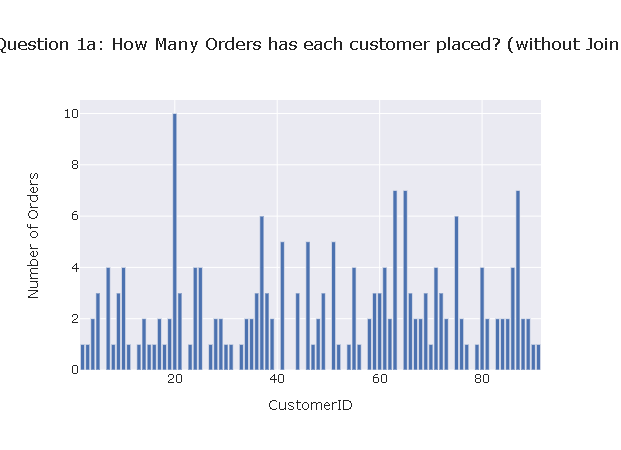

In [41]:
# plot
fig = px.bar(df_products_by_category, 
             x='CustomerID', 
             y='ShipperID',
             template='seaborn',
             labels = {'ShipperID':'Number of Orders'},
             title='Question 1a: How Many Orders has each customer placed? (without Join)')
fig.show()


In [42]:
# The Categories table has the category names we need to improve our plot
df_categories = pd.read_excel("Data/w3schools_Data.xlsx", "Customers", skiprows=2)

print(df_categories.shape)
df_categories.head()

(91, 7)


,CustomerID,CustomerName,ContactName,Address,City,PostalCode,Country
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constitución 2222,México D.F.,5021,Mexico
2,3,Antonio Moreno Taquería,Antonio Moreno,Mataderos 2312,México D.F.,5023,Mexico
3,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK
4,5,Berglunds snabbköp,Christina Berglund,Berguvsvägen 8,Luleå,S-958 22,Sweden


In [43]:
# Create a new Dataframe that starts with the products table and adds the columns 
# we want from the categories table
df_prod_cat = pd.merge(df_products, df_categories, on='CustomerID', how='left')

print(df_prod_cat.shape)
df_prod_cat.head()

(196, 11)


,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID,CustomerName,ContactName,Address,City,PostalCode,Country
0,10248,90,5,1996-07-04,3,Wilman Kala,Matti Karttunen,Keskuskatu 45,Helsinki,21240,Finland
1,10249,81,6,1996-07-05,1,Tradição Hipermercados,Anabela Domingues,"Av. Inês de Castro, 414",São Paulo,05634-030,Brazil
2,10250,34,4,1996-07-08,2,Hanari Carnes,Mario Pontes,"Rua do Paço, 67",Rio de Janeiro,05454-876,Brazil
3,10251,84,3,1996-07-08,1,Victuailles en stock,Mary Saveley,"2, rue du Commerce",Lyon,69004,France
4,10252,76,4,1996-07-09,2,Suprêmes délices,Pascale Cartrain,"Boulevard Tirou, 255",Charleroi,B-6000,Belgium


In [44]:
print(df_prod_cat.shape)

(196, 11)


### GroupBy and Plot: *After* the Left Join

In [45]:
df_prod_cat_by_catname = df_prod_cat.groupby('CustomerName').count()

print(df_prod_cat_by_catname.shape)
df_prod_cat_by_catname.head()

(74, 10)


,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID,ContactName,Address,City,PostalCode,Country
CustomerName,,,,,,,,,,
Ana Trujillo Emparedados y helados,1,1,1,1,1,1,1,1,1,1
Antonio Moreno Taquería,1,1,1,1,1,1,1,1,1,1
Around the Horn,2,2,2,2,2,2,2,2,2,2
B's Beverages,1,1,1,1,1,1,1,1,1,1
Berglunds snabbköp,3,3,3,3,3,3,3,3,3,3


In [46]:
# Get CategoryName out of index and into a regular column
df_prod_cat_by_catname.reset_index(inplace=True)

print(df_prod_cat_by_catname.shape)
df_prod_cat_by_catname.head()

(74, 11)


,CustomerName,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID,ContactName,Address,City,PostalCode,Country
0,Ana Trujillo Emparedados y helados,1,1,1,1,1,1,1,1,1,1
1,Antonio Moreno Taquería,1,1,1,1,1,1,1,1,1,1
2,Around the Horn,2,2,2,2,2,2,2,2,2,2
3,B's Beverages,1,1,1,1,1,1,1,1,1,1
4,Berglunds snabbköp,3,3,3,3,3,3,3,3,3,3


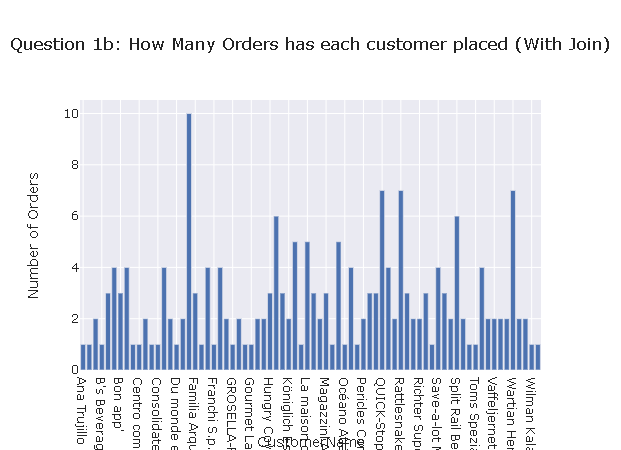

In [47]:
# Vertical Bar Chart:  Inventory value by Category
fig = px.bar(df_prod_cat_by_catname, 
             x='CustomerName', 
             y='ShipperID',
             #width=900,
             #height=400,
             template='seaborn',
             labels = {'ShipperID':'Number of Orders'},
             title='Question 1b: How Many Orders has each customer placed (With Join)')
fig.show()


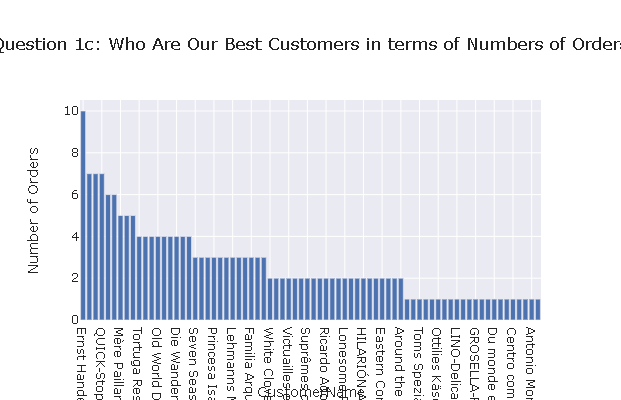

In [48]:
# Vertical Bar Chart:  Inventory value by Category
fig = px.bar(df_prod_cat_by_catname, 
             x='CustomerName', 
             y='ShipperID',
             width=900,
             height=400,
             template='seaborn',
             labels = {'ShipperID':'Number of Orders'},
             title='Question 1c: Who Are Our Best Customers in terms of Numbers of Orders')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()


# Question 2

In [57]:
# Read the w3schools products data
df_products = pd.read_excel("Data/w3schools_Data.xlsx", "Employees", skiprows=0)

print(df_products.shape)
df_products.head()

(10, 6)


,EmployeeID,LastName,FirstName,BirthDate,Photo,Notes
0,1,Davolio,Nancy,25180,EmpID1.pic,Education includes a BA in psychology from Col...
1,2,Fuller,Andrew,19043,EmpID2.pic,Andrew received his BTS commercial and a Ph.D....
2,3,Leverling,Janet,23253,EmpID3.pic,Janet has a BS degree in chemistry from Boston...
3,4,Peacock,Margaret,21447,EmpID4.pic,Margaret holds a BA in English literature from...
4,5,Buchanan,Steven,20152,EmpID5.pic,Steven Buchanan graduated from St. Andrews Uni...


In [58]:
df_products_by_category = df_products.groupby('EmployeeID').count()

print(df_products_by_category.shape)
df_products_by_category.head()

(10, 5)


,LastName,FirstName,BirthDate,Photo,Notes
EmployeeID,,,,,
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1
5,1,1,1,1,1


In [59]:
df_products_by_category.reset_index(inplace=True)

print(df_products_by_category.shape)
df_products_by_category.head()

(10, 6)


,EmployeeID,LastName,FirstName,BirthDate,Photo,Notes
0,1,1,1,1,1,1
1,2,1,1,1,1,1
2,3,1,1,1,1,1
3,4,1,1,1,1,1
4,5,1,1,1,1,1


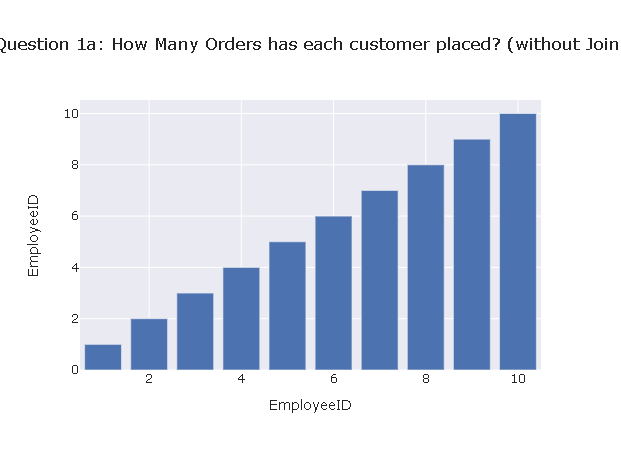

In [60]:
# plot
fig = px.bar(df_products_by_category, 
             x='EmployeeID', 
             y='EmployeeID',
             template='seaborn',
             #labels = {'ShipperID':'Number of Orders'},
             title='Question 1a: How Many Orders has each customer placed? (without Join)')
fig.show()


In [63]:
# The Categories table has the category names we need to improve our plot
df_categories = pd.read_excel("Data/w3schools_Data.xlsx", "Orders", skiprows=0)

print(df_categories.shape)
df_categories.head()

(196, 5)


,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID
0,10248,90,5,1996-07-04,3
1,10249,81,6,1996-07-05,1
2,10250,34,4,1996-07-08,2
3,10251,84,3,1996-07-08,1
4,10252,76,4,1996-07-09,2


In [69]:
# Create a new Dataframe that starts with the products table and adds the columns 
# we want from the categories table
df_prod_cat = pd.merge(df_products, df_categories, on='ShipperID', how='left')

print(df_prod_cat.shape)
df_prod_cat.head()

KeyError: 'ShipperID'

In [ ]:
print(df_prod_cat.shape)

### GroupBy and Plot: *After* the Left Join

In [ ]:
df_prod_cat_by_catname = df_prod_cat.groupby('CustomerName').count()

print(df_prod_cat_by_catname.shape)
df_prod_cat_by_catname.head()

In [ ]:
# Get CategoryName out of index and into a regular column
df_prod_cat_by_catname.reset_index(inplace=True)

print(df_prod_cat_by_catname.shape)
df_prod_cat_by_catname.head()

In [ ]:
# Vertical Bar Chart:  Inventory value by Category
fig = px.bar(df_prod_cat_by_catname, 
             x='CustomerName', 
             y='ShipperID',
             #width=900,
             #height=400,
             template='seaborn',
             labels = {'ShipperID':'Number of Orders'},
             title='Question 1b: How Many Orders has each customer placed (With Join)')
fig.show()


In [ ]:
# Vertical Bar Chart:  Inventory value by Category
fig = px.bar(df_prod_cat_by_catname, 
             x='CustomerName', 
             y='ShipperID',
             width=900,
             height=400,
             template='seaborn',
             labels = {'ShipperID':'Number of Orders'},
             title='Question 1c: Who Are Our Best Customers in terms of Numbers of Orders')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()
